In [10]:
import pandas as pd

# Load the dataset
file_path = 'loan.csv'
loan_data = pd.read_csv(file_path,low_memory=False)

# Display the first few rows of the dataset
loan_data.head()

#


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [20]:
# Check for missing values
missing_values = loan_data.isnull().sum()
missing_values_percent = (missing_values / len(loan_data)) * 100

# Check data types of each column
data_types = loan_data.dtypes

# Generate summary statistics for numerical variables
summary_statistics = loan_data.describe()

# Display results
missing_values_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percent})
missing_values_summary = missing_values_summary[missing_values_summary['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

missing_values_summary, data_types, summary_statistics


(                            Missing Values  Percentage
 bc_open_to_buy                       39717  100.000000
 acc_open_past_24mths                 39717  100.000000
 bc_util                              39717  100.000000
 mo_sin_old_il_acct                   39717  100.000000
 mo_sin_old_rev_tl_op                 39717  100.000000
 ...                                    ...         ...
 collections_12_mths_ex_med              56    0.140998
 revol_util                              50    0.125891
 tax_liens                               39    0.098195
 title                                   11    0.027696
 last_credit_pull_d                       2    0.005036
 
 [68 rows x 2 columns],
 id                              int64
 member_id                       int64
 loan_amnt                       int64
 funded_amnt                     int64
 funded_amnt_inv               float64
                                ...   
 tax_liens                     float64
 tot_hi_cred_lim             

In [21]:
# Drop columns with more than 90% missing values
columns_to_drop = missing_values_summary[missing_values_summary['Percentage'] > 90].index
loan_data_cleaned = loan_data.drop(columns=columns_to_drop)

# Convert appropriate columns to numeric, removing the '%' sign and converting to float for `int_rate` and `revol_util`
loan_data_cleaned['int_rate'] = loan_data_cleaned['int_rate'].str.replace('%', '').astype(float)
loan_data_cleaned['revol_util'] = loan_data_cleaned['revol_util'].str.replace('%', '').astype(float)

# Drop rows with missing values in the target variable `loan_status`
loan_data_cleaned = loan_data_cleaned.dropna(subset=['loan_status'])

# Display the cleaned dataset info to verify changes
loan_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


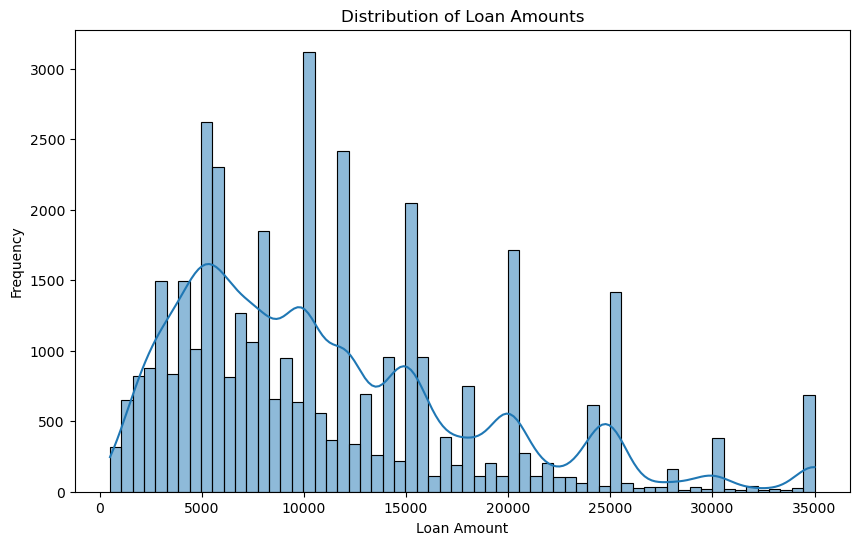

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


In [19]:
# Check for missing values
missing_values = loan_data.isnull().sum()
missing_values_percent = (missing_values / len(loan_data)) * 100

# Check data types of each column
data_types = loan_data.dtypes

# Generate summary statistics for numerical variables
summary_statistics = loan_data.describe()

# Display results
missing_values_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percent})
missing_values_summary = missing_values_summary[missing_values_summary['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

missing_values_summary, data_types, summary_statistics


(                            Missing Values  Percentage
 bc_open_to_buy                       39717  100.000000
 acc_open_past_24mths                 39717  100.000000
 bc_util                              39717  100.000000
 mo_sin_old_il_acct                   39717  100.000000
 mo_sin_old_rev_tl_op                 39717  100.000000
 ...                                    ...         ...
 collections_12_mths_ex_med              56    0.140998
 revol_util                              50    0.125891
 tax_liens                               39    0.098195
 title                                   11    0.027696
 last_credit_pull_d                       2    0.005036
 
 [68 rows x 2 columns],
 id                              int64
 member_id                       int64
 loan_amnt                       int64
 funded_amnt                     int64
 funded_amnt_inv               float64
                                ...   
 tax_liens                     float64
 tot_hi_cred_lim             

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


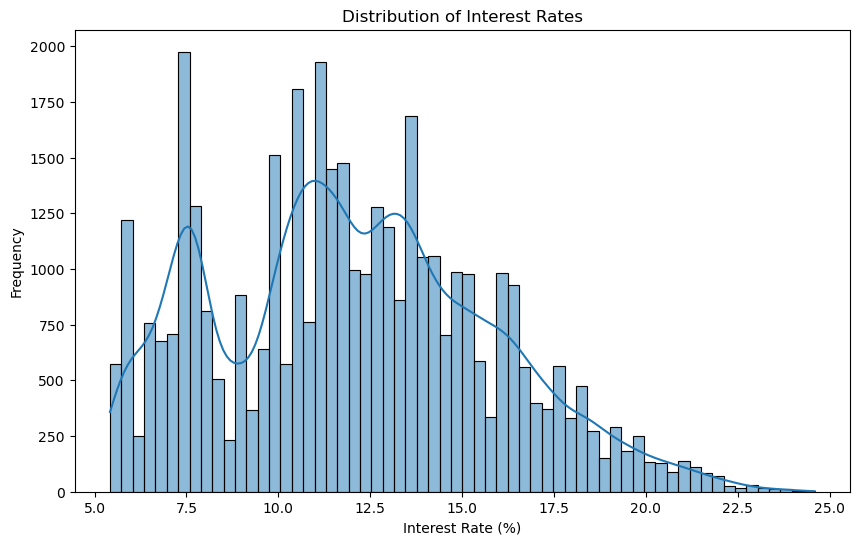

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['int_rate'], kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()


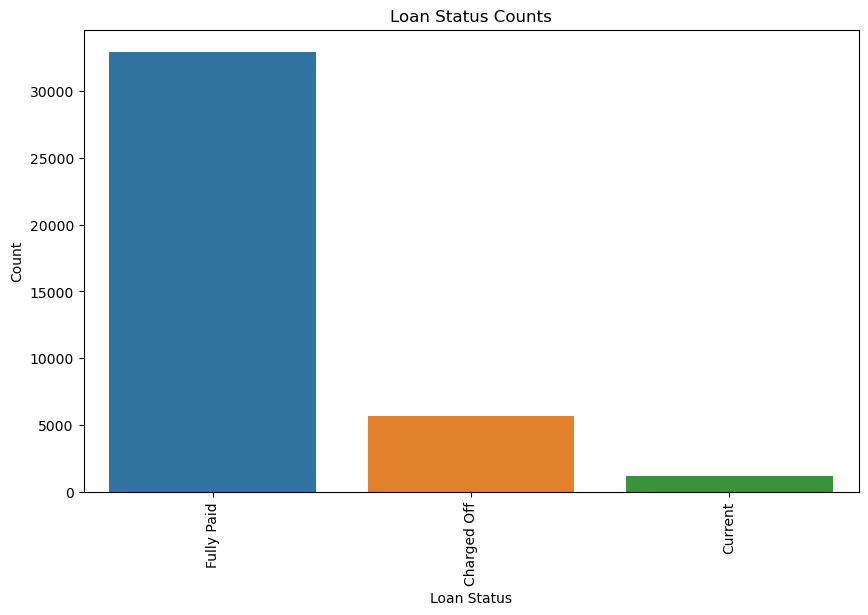

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data_cleaned, x='loan_status', order=loan_data_cleaned['loan_status'].value_counts().index)
plt.title('Loan Status Counts')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [25]:
plt.figure(figsize=(14, 10))
correlation_matrix = loan_data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: ' 36 months'

<Figure size 1400x1000 with 0 Axes>

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


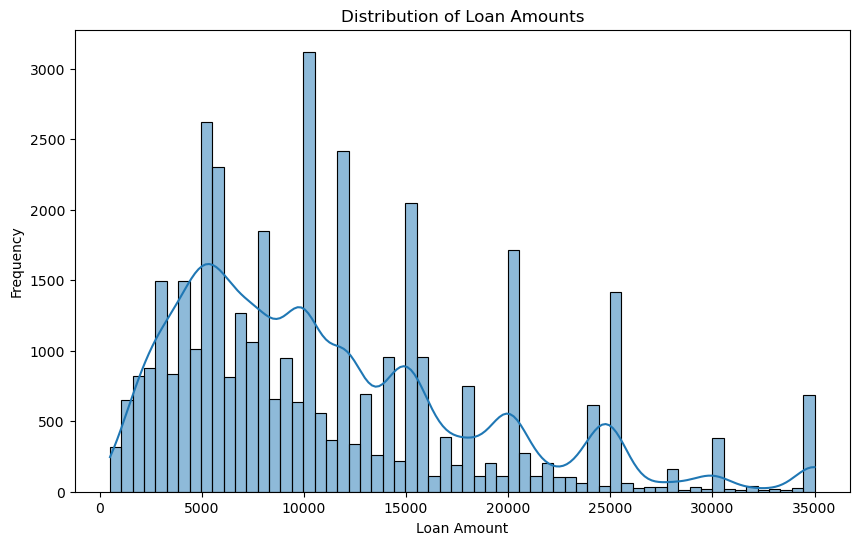

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


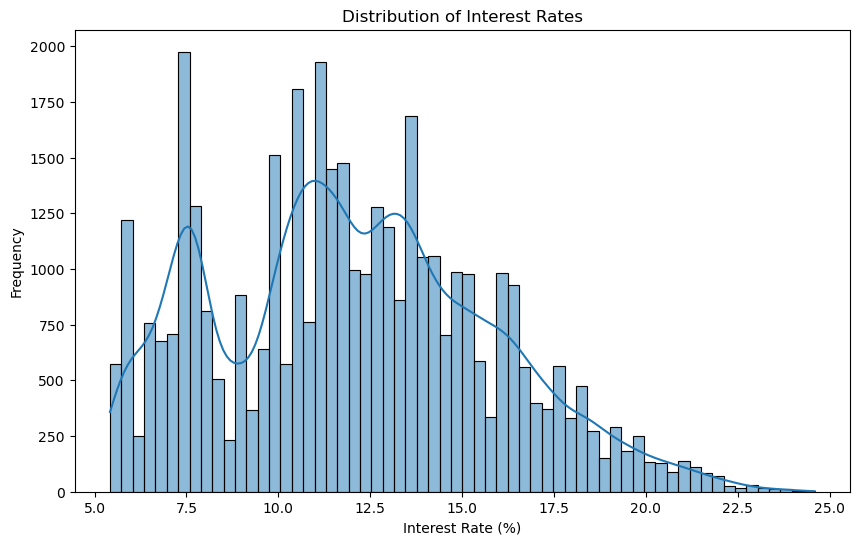

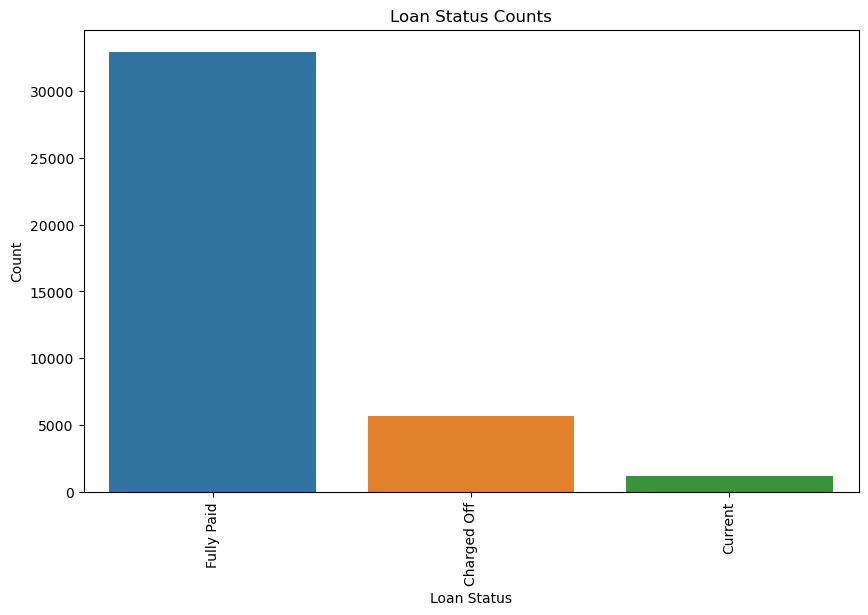

ValueError: could not convert string to float: ' 36 months'

<Figure size 1400x1000 with 0 Axes>

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the target variable
loan_data_cleaned['target'] = loan_data_cleaned['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

# Plot the distribution of loan amounts
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of interest rates
plt.figure(figsize=(10, 6))
sns.histplot(loan_data_cleaned['int_rate'], kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Plot the loan status counts
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_data_cleaned, x='loan_status', order=loan_data_cleaned['loan_status'].value_counts().index)
plt.title('Loan Status Counts')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = loan_data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the CSV file
loan_data_cleaned = pd.read_csv('loan.csv')

mixed_cols = loan_data_cleaned.select_dtypes(include='object').columns

# Convert mixed-type columns to appropriate data types
for col in mixed_cols:
    try:
        loan_data_cleaned[col] = loan_data_cleaned[col].str.replace(' months', '').astype(float)
    except ValueError:
        loan_data_cleaned[col] = loan_data_cleaned[col].astype(str)


# Create the correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = loan_data_cleaned.corr()

# Plot the correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/var/folders/2s/59v18b_d20553qs0hzvtffkr0000gn/T/ipykernel_33148/2570830036.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_cleaned = pd.read_csv('loan.csv')


ValueError: could not convert string to float: 'INDIVIDUAL'

<Figure size 1400x1000 with 0 Axes>

/var/folders/2s/59v18b_d20553qs0hzvtffkr0000gn/T/ipykernel_33148/2287170855.py:6: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_cleaned = pd.read_csv('loan.csv')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


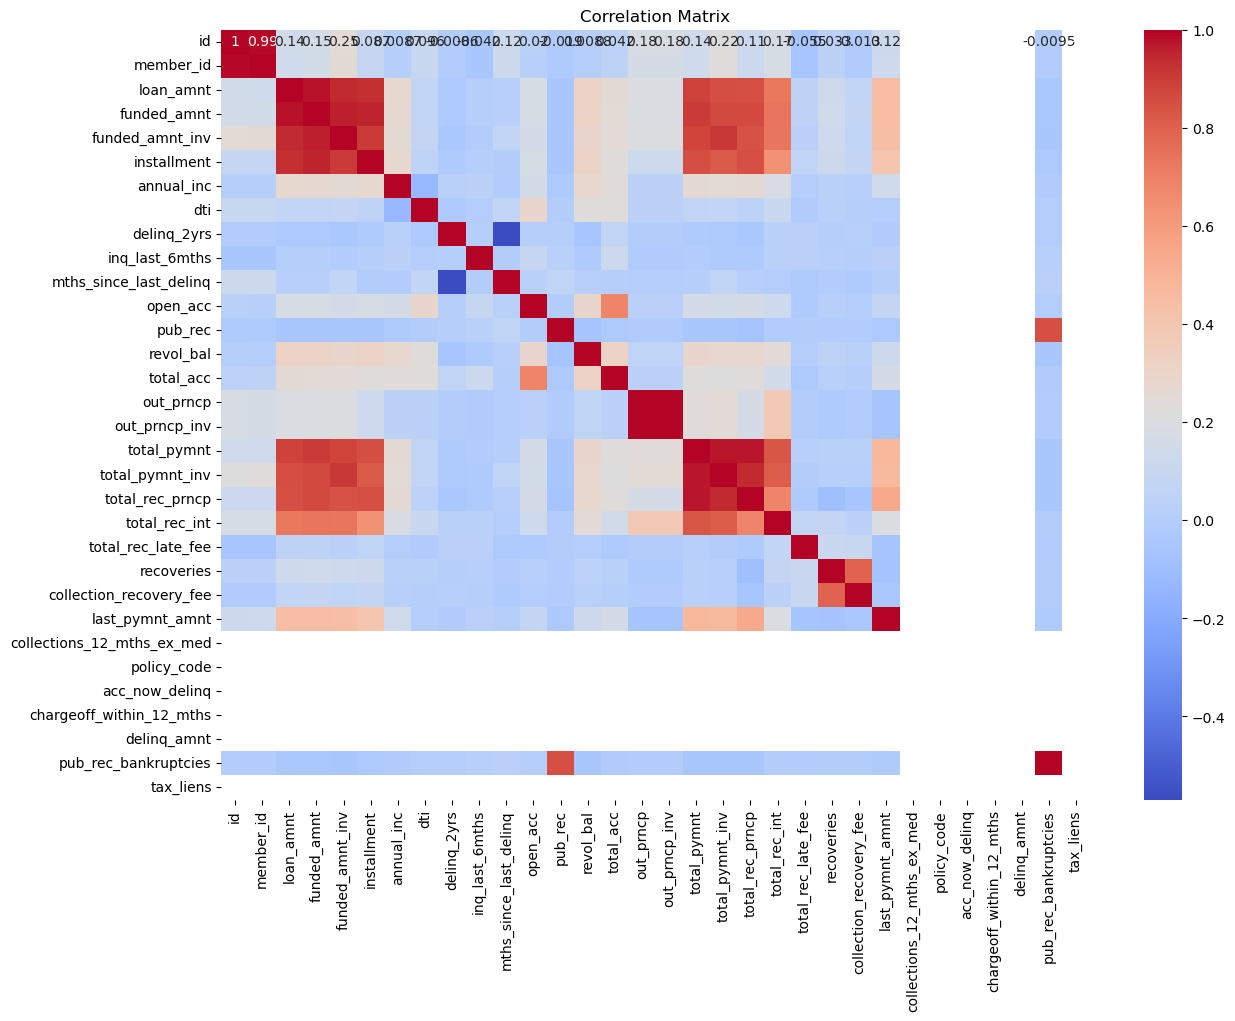

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
loan_data_cleaned = pd.read_csv('loan.csv')

# Identify columns with mixed data types
mixed_cols = loan_data_cleaned.select_dtypes(include='object').columns

# Convert mixed-type columns to appropriate data types
for col in mixed_cols:
    try:
        loan_data_cleaned[col] = pd.to_numeric(loan_data_cleaned[col], errors='coerce')
    except ValueError:
        pass

# Drop columns with more than 90% missing values
missing_pct = loan_data_cleaned.isnull().mean() * 100
loan_data_cleaned = loan_data_cleaned.loc[:, missing_pct < 90]

# Create the correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = loan_data_cleaned.corr()

# Plot the correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()